# Breast Cancer Project Kaggle

First import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm



Import data with pandas as dataframe:


In [4]:
df = pd.read_csv('data.csv')

In [5]:
#Check the status of the dataframe:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning:

In [6]:
#Check for Missing Values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
#isna() or isnull() to see and sum() to total all true null values for each column:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# it appears Unnamed 32 has no place here, I drop it
df.drop('Unnamed: 32', 1, inplace=True)

In [9]:
#Check for duplicates:
df.duplicated().sum()

0

We can see some whitespace in a couple of column names

In [10]:
# Eliminate whitespace
df.columns = df.columns.str.replace(' ', '_')
# check for whitespace:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
#Check for extraneous values

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 883263     0.001757
906564     0.001757
89122      0.001757
9013579    0.001757
868682     0.001757
Name: id, dtype: float64 


diagnosis 
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64 


radius_mean 
 12.34    0.007030
12.77    0.005272
15.46    0.005272
12.89    0.005272
13.05    0.005272
Name: radius_mean, dtype: float64 


texture_mean 
 14.93    0.005272
15.70    0.005272
18.90    0.005272
16.84    0.005272
17.46    0.005272
Name: texture_mean, dtype: float64 


perimeter_mean 
 82.61     0.005272
134.70    0.005272
87.76     0.005272
130.00    0.003515
58.79     0.003515
Name: perimeter_mean, dtype: float64 


area_mean 
 512.2     0.005272
1214.0    0.003515
399.8     0.003515
758.6     0.003515
1075.0    0.003515
Name: area_mean, dtype: float64 


smoothness_mean 
 0.1007    0.008787
0.1075    0.007030
0.1054    0.007030
0.1150    0.007030
0.1089    0.005272
Name: smoothness_mean, dtype: float64 


compactness_mean 
 0.12060    0.005272
0.11470    0.005272
0

### Screen for Categorical Data


Note that one of our columns 'Diagnosis' has type: Object 

We will have to treat exploratory analysis for this data differently to the other continuous float data sources.

In [6]:
df.info()
#Note 'diagnosis' an object type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [14]:
df.shape

(569, 32)

# Histograms to check Normality of Data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18bc5610>,
      dtype=object)

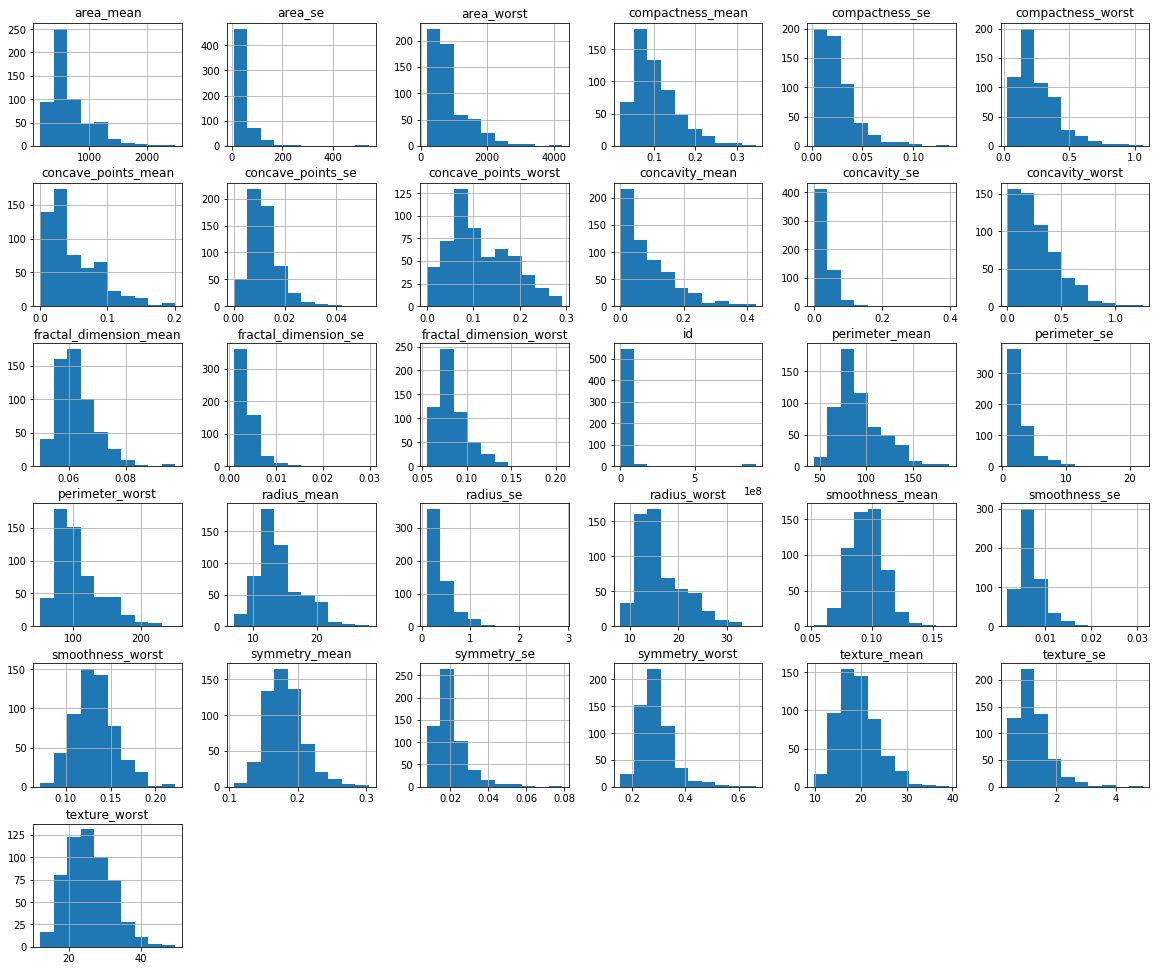

In [15]:
hist = df.hist(figsize=(20,17))
hist

Above we can observe normality of distribution for each feature in the dataset.
There are several features which appear to have a normal distribution including: Texture_worst, Smoothness_worst, Texture_mean, Smoothness_mean and Symmetry_mean. Although These features aren't exempt to outliers and we can look into removing them as necessary down the line.

# Transformation for Standardisation:

In [9]:
df_temp_join = pd.DataFrame()
non_normal = ['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst']

for feat in non_normal:
    df_temp_join[feat] = df[feat].map(lambda x: np.cbrt(x))


KeyError: 'concave_points_mean'

In [13]:
df_norms = df.join(df_temp_join, rsuffix='CBRT_') 
df_norms.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32,area_meanCBRT_,area_worstCBRT_,compactness_meanCBRT_,compactness_worstCBRT_
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,10.003332,12.638982,0.652339,0.873114
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,10.986209,12.506130,0.428431,0.571440
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,10.635434,11.955856,0.542770,0.751552
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,7.281708,8.280177,0.657237,0.953285
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,10.905527,11.634834,0.510191,0.589637


Make a new df (dataframe_normalised) which drops unnecessary non-normalised values and values we know we il not use(any standard error columns)

In [14]:
df_normalised = df_norms.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se'], axis = 1)

In [15]:
df_normalised = df_normalised.drop(['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst'], axis = 1)

In [16]:
df_normalised.head()

,id,diagnosis,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,Unnamed:_32,area_meanCBRT_,area_worstCBRT_,compactness_meanCBRT_,compactness_worstCBRT_
0,842302,M,10.38,0.11840,0.2419,17.33,0.1622,NaN,10.003332,12.638982,0.652339,0.873114
1,842517,M,17.77,0.08474,0.1812,23.41,0.1238,NaN,10.986209,12.506130,0.428431,0.571440
2,84300903,M,21.25,0.10960,0.2069,25.53,0.1444,NaN,10.635434,11.955856,0.542770,0.751552
3,84348301,M,20.38,0.14250,0.2597,26.50,0.2098,NaN,7.281708,8.280177,0.657237,0.953285
4,84358402,M,14.34,0.10030,0.1809,16.67,0.1374,NaN,10.905527,11.634834,0.510191,0.589637


# Check distribution again

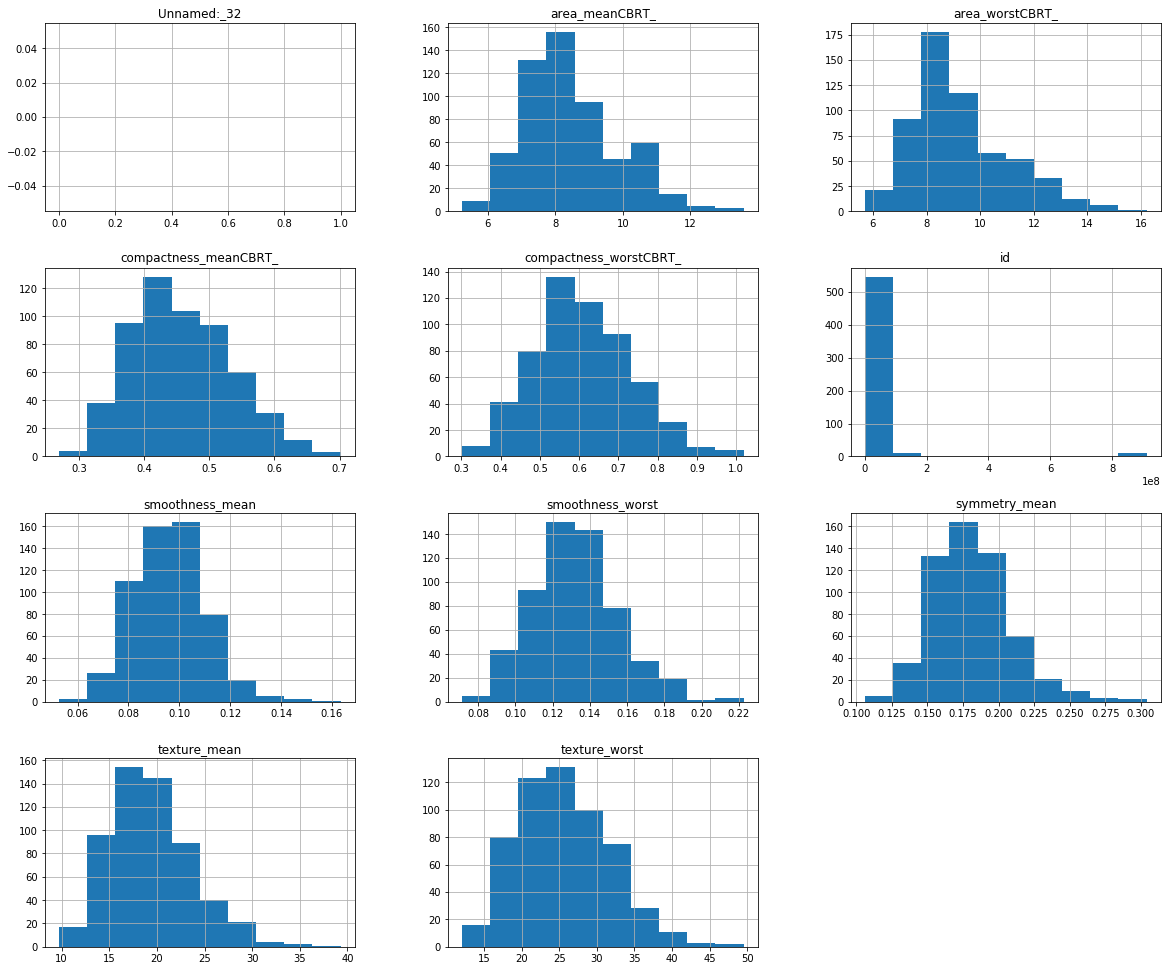

In [17]:
normalised_hist = df_normalised.hist(figsize=(20,17))


# Address Outliers

Due to losing almost half the data, we chose not to include the proces below outlined here:
- calculate quartile 0.25 , 0.75 and IQR and remove all IQR*1.5 vallues above and below the upper and lower quartiles


In [19]:
# #Below I create upper and lower quartiles to evaluate IQR and therefore IQR*1.5 
# Q1 = df2.quantile(0.25)
# Q3 = df2.quantile(0.75)
# IQR = Q3 - Q1
# cons=IQR*1.5
# print(cons)

# 5.369000e-02

id                              1.191587e+07
radius_mean                     6.120000e+00
texture_mean                    8.445000e+00
perimeter_mean                  4.339500e+01
area_mean                       5.436000e+02
smoothness_mean                 2.839500e-02
compactness_mean                9.822000e-02
concavity_mean                  1.517100e-01
concave_points_mean             8.053500e-02
symmetry_mean                   5.070000e-02
fractal_dimension_mean          1.263000e-02
radius_se                       3.697500e-01
texture_se                      9.601500e-01
perimeter_se                    2.626500e+00
area_se                         4.101000e+01
smoothness_se                   4.465500e-03
compactness_se                  2.905500e-02
concavity_se                    4.044000e-02
concave_points_se               1.060800e-02
symmetry_se                     1.248000e-02
fractal_dimension_se            3.465000e-03
radius_worst                    8.670000e+00
texture_wo

In [20]:
# #these iqr*1.5 values will be used to eliminate outliers in following code
# upper_outlier = Q3+cons
# lower_outlier = Q1-cons
# print(upper_outlier)
# print('-------------')
# # print(lower_outlier)


id                              2.072900e+07
radius_mean                     2.190000e+01
texture_mean                    3.024500e+01
perimeter_mean                  1.474950e+02
area_mean                       1.326300e+03
smoothness_mean                 1.336950e-01
compactness_mean                2.286200e-01
concavity_mean                  2.824100e-01
concave_points_mean             1.545350e-01
symmetry_mean                   2.464000e-01
fractal_dimension_mean          7.875000e-02
radius_se                       8.486500e-01
texture_se                      2.434150e+00
perimeter_se                    5.983500e+00
area_se                         8.620000e+01
smoothness_se                   1.261150e-02
compactness_se                  6.150500e-02
concavity_se                    8.249000e-02
concave_points_se               2.531800e-02
symmetry_se                     3.596000e-02
fractal_dimension_se            8.023000e-03
radius_worst                    2.746000e+01
texture_wo

In [21]:
#Check the datatype of the outlier values 
# type(upper_outlier), type(lower_outlier)

(pandas.core.series.Series, pandas.core.series.Series)

In [22]:
#They are pandas series, a quick google shows we can loop through them 
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25b81a90>,
      dtype=object)

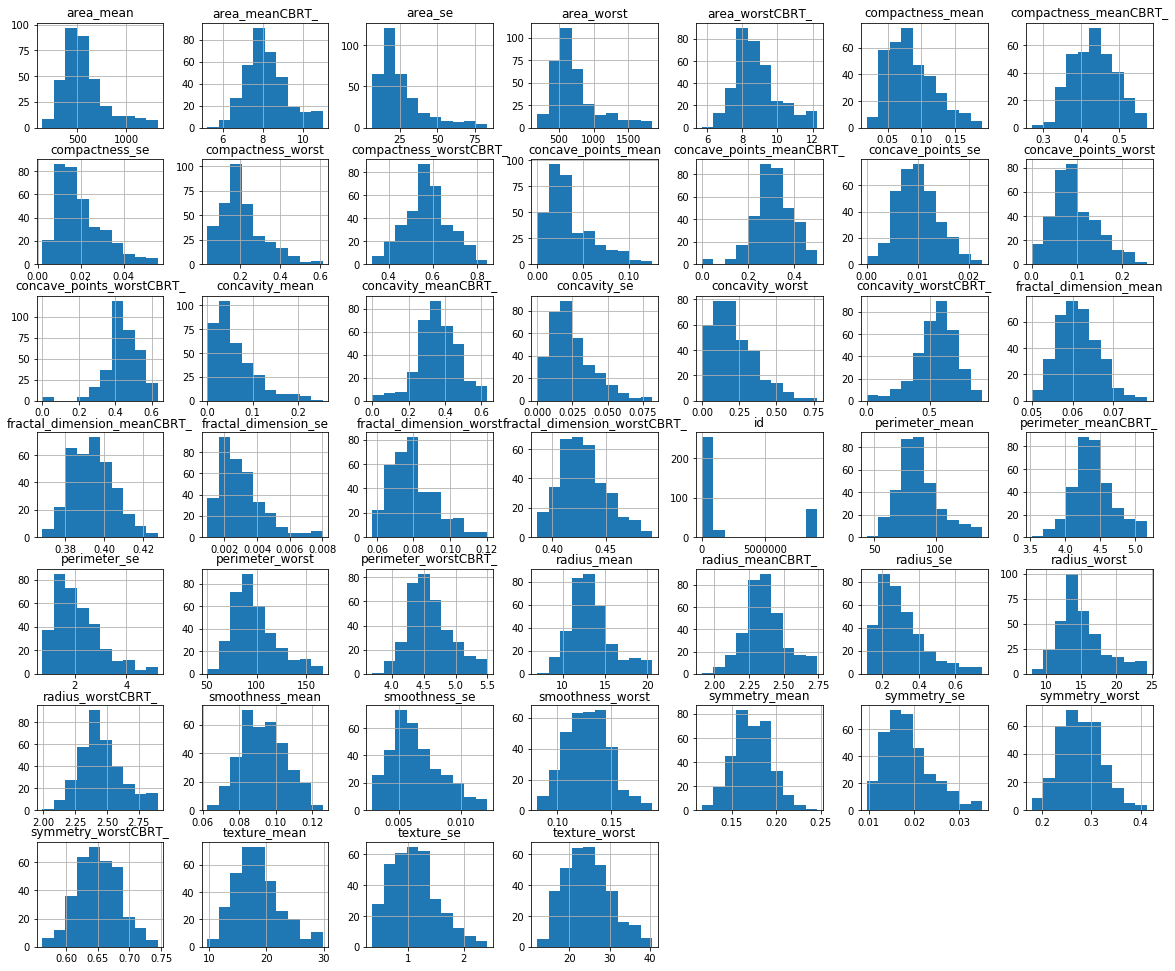

In [23]:
# df3.hist(figsize=(20,17))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2472ced0>,
      dtype=object)

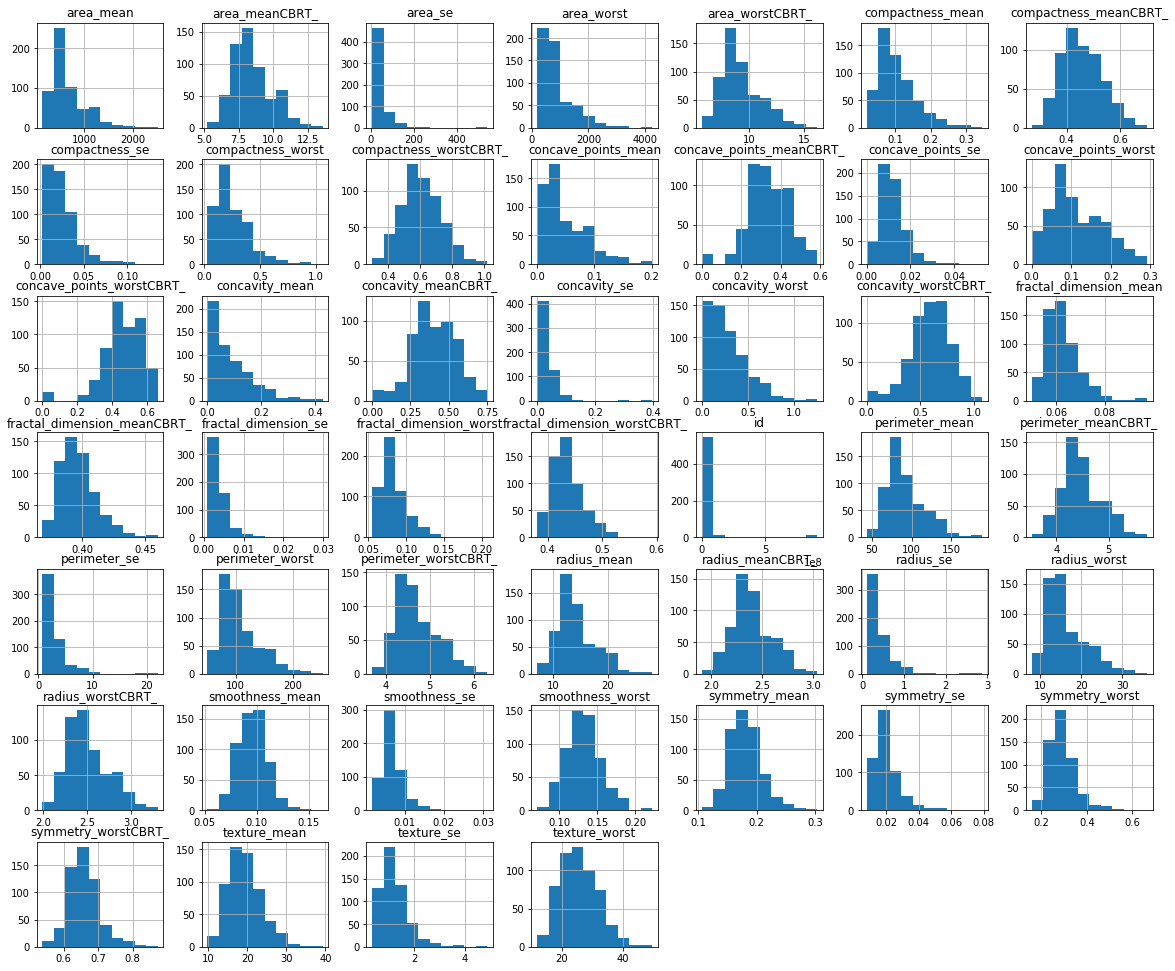

In [44]:
# df2.hist(figsize=(20,17))

# Correlation Heatmap

# Pairwise plot with Seaborn to show 